# Chennai House price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
df.shape


(7109, 22)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Dropping unwanted columns

In [6]:
df.drop(['PRT_ID', 'REG_FEE', 'COMMIS'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [7]:
df.shape

(7109, 19)

Checking missing values

In [8]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

Imputing values

In [9]:
print(df['N_BEDROOM'].value_counts())

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [10]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace = True)


In [11]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [12]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace = True)


In [13]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [14]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].median(),inplace=True)


In [15]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

There are no null values now.

# Data Cleaning

Dropping duplicates

In [16]:
df.drop_duplicates()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [17]:
df.shape
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [18]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

Changing and getting recquired Datatype

In [19]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

Creating Age of the building column based on the datesale and datebuild columns


In [20]:
df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                       int64
dtype: object

In [21]:
df.head

<bound method NDFrame.head of             AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004 2011-05-04            131          1           1   
1     Anna Nagar      1986 2006-12-19             26          2           1   
2          Adyar       909 2012-02-04             70          1           1   
3      Velachery      1855 2010-03-13             14          3           2   
4     Karapakkam      1226 2009-10-05             84          1           1   
...          ...       ...        ...            ...        ...         ...   
7104  Karapakkam       598 2011-01-03             51          1           1   
7105   Velachery      1897 2004-04-08             52          3           2   
7106   Velachery      1614 2006-08-25            152          2           1   
7107  Karapakkam       787 2009-08-03             40          1           1   
7108   Velachery      1896 2005-07-13            156          3           2   

      N_ROOM    SALE_

In [22]:
df.describe #for numerical columns

<bound method NDFrame.describe of             AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004 2011-05-04            131          1           1   
1     Anna Nagar      1986 2006-12-19             26          2           1   
2          Adyar       909 2012-02-04             70          1           1   
3      Velachery      1855 2010-03-13             14          3           2   
4     Karapakkam      1226 2009-10-05             84          1           1   
...          ...       ...        ...            ...        ...         ...   
7104  Karapakkam       598 2011-01-03             51          1           1   
7105   Velachery      1897 2004-04-08             52          3           2   
7106   Velachery      1614 2006-08-25            152          2           1   
7107  Karapakkam       787 2009-08-03             40          1           1   
7108   Velachery      1896 2005-07-13            156          3           2   

      N_ROOM    S

Categorical Columns are AREA, PARK_FACIL, UTILITY_AVAIL, STREET, BUILDTYPE, MZZONE, SALE_COND

Checking Unique elements in Categorical Columns

In [23]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


Here we see there are mistakes in the area words.

Correcting the words for better understanding.(Spelling Mistakes)

In [24]:

df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar',],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],  'T Nagar', inplace = True)

df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ', 'NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [25]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [26]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

#Exploratory Data Analysis

EDA for Categorical Columns

Checking Relationship in between the AREA Feature and SALES_PRICE Target columns


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

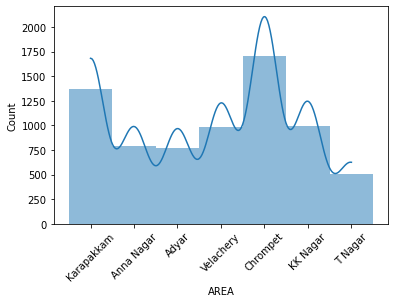

In [27]:
sns.histplot(df.AREA, linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

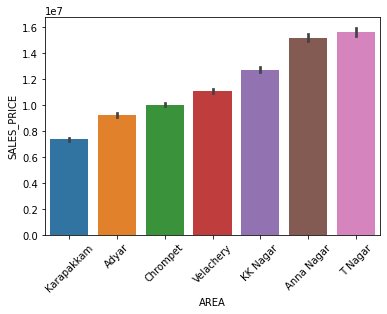

In [28]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = area_order)
plt.xticks(rotation=45)

Anna Nagar and T Nagar are the area's with highest sale-price.

There is a Linear Relationship in between AREA Feature and SALES_PRICE Target. So, will do label encoding for AREA column. This feature will help in model fitting.

Checking Relationship in between the SALE_COND Feature and SALES_PRICE Target columns


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

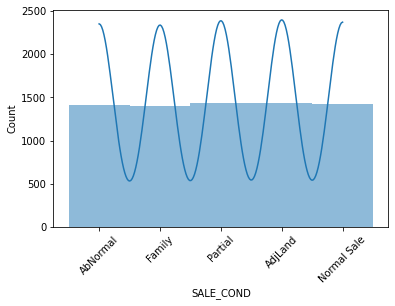

In [29]:
sns.histplot(df.SALE_COND, linewidth=0,kde=True)
plt.xticks(rotation=45)

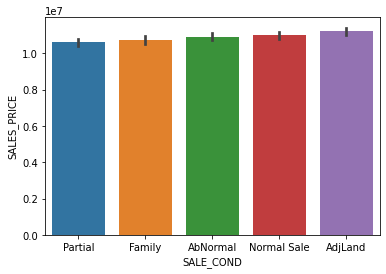

In [30]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = sale_cond_order)


In SALE_COND condition Column, all Categories are uniformly distributed.

1)There is no Relationship between SALE_COND Feature and SALES_PRICE Target Columns.
2)will drop the SALE_COND feature from this dataset.

Checking Relationship in between the PARK_FACIL Feature and SALES_PRICE Target columns


([0, 1], <a list of 2 Text major ticklabel objects>)

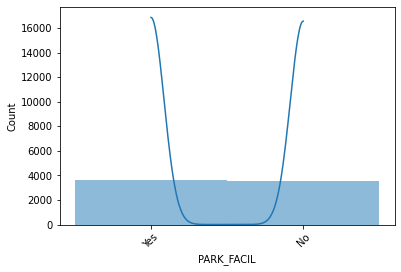

In [31]:
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

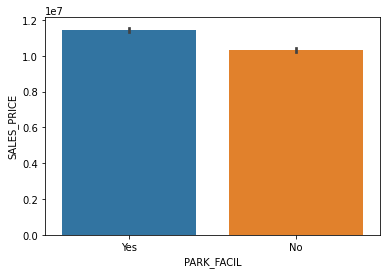

In [32]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)


1)Houses having Park Facilities are more expensive than the houses with no park facility. 2)There is a strong linear relationship in between PARK_FACIL Feature and SALES_PRICE Target. 3)This feature is very useful at the time of model fitting

Checking Relationship in between the BUILDTYPE Feature and SALES_PRICE Target columns


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

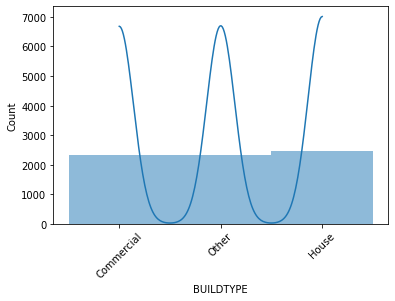

In [33]:
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)
plt.xticks(rotation=45)

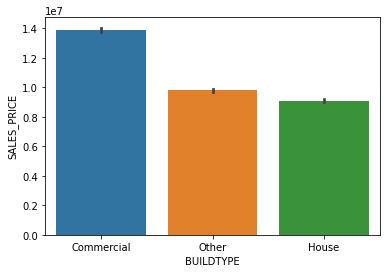

In [34]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)


Commercial Buildings are expensive than the other type of buildings.

There is a relationship in between the BUILDTYPE Feature and SALES_PRICE Target. But there is no linear relationship in between these features. So, will do ONE - HOT encoding for BUILDTYPE column. (will keep this feature as it is)

Checking Relationship in between the UTILITY_AVAIL Feature and SALES_PRICE Target columns


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

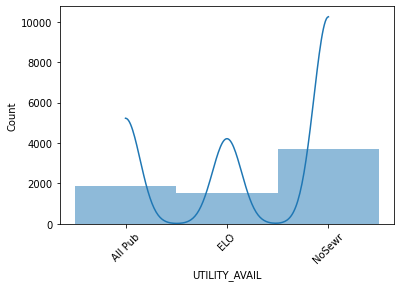

In [35]:
sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

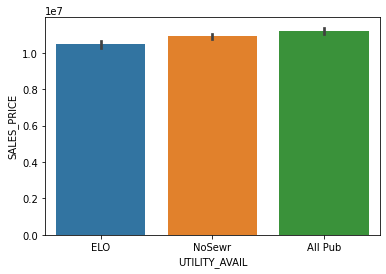

In [36]:
utility_avail_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order = utility_avail_order)


There is a linear relationship in between the UTILITY_AVAIL Feature and SALES_PRICE Target. So, will do label encoding for UTILITY_AVAIL column. (Will use this feature in model fitting)

Checking Relationship in between the STREET Feature and SALES_PRICE Target columns


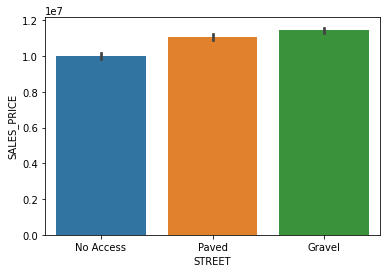

In [37]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = street_order)


Gravel Street houses are more expensive than other types.

There is a linear relationship in between the STREET Feature and SALES_PRICE Target. So, will do label encoding for this STREET feature. (Will use this feature for furthur process)

Checking Relationship in between the MZZONE Feature and SALES_PRICE Target columns


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

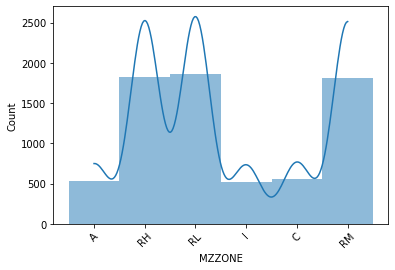

In [38]:
sns.histplot(df.MZZONE, linewidth=0,kde=True)
plt.xticks(rotation=45)

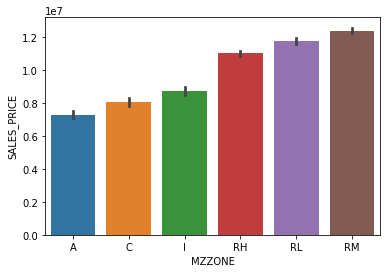

In [39]:
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order = mzzone_order)
    

MZZONE with the values 'RM','RL' & 'RH' has higher sales_price than the other values

There is a linear relationship in between the MZZONE Feature and SALES_PRICE Target. So, will do label encoding for MZZONE feature. (Will use this feature for furthur process)

Checking Relationship in between the N_BEDROOM Feature and SALES_PRICE Target columns


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 11 Text major ticklabel objects>)

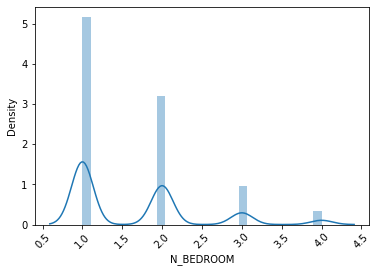

In [40]:
sns.distplot(df['N_BEDROOM'])
plt.xticks(rotation = 45)

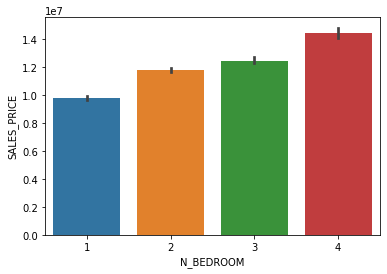

In [41]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)


Number of bed rooms increasing then Sales price also increasing.

There is a linear relationship in between the N_BEDROOM Feature and SALES_PRICE Target.

Checking Relationship in between the N_BATHROOM Feature and SALES_PRICE Target columns



(array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]),
 <a list of 10 Text major ticklabel objects>)

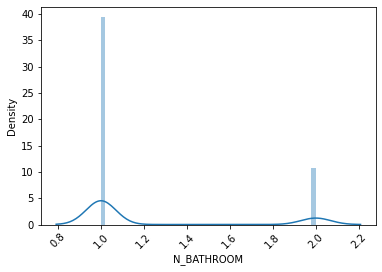

In [42]:
sns.distplot(df['N_BATHROOM'])
plt.xticks(rotation = 45)

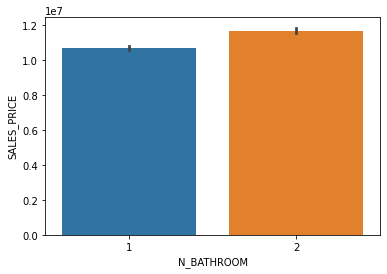

In [43]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)


N_BATHROOM increases then SALES_PRICE is automatically increasing.

There is a linear relationship in between the N_BATHROOM Feature and SALES_PRICE Target columns.

Checking Relationship in between the N_ROOM Feature and SALES_PRICE Target columns



(array([1., 2., 3., 4., 5., 6., 7.]),
 <a list of 7 Text major ticklabel objects>)

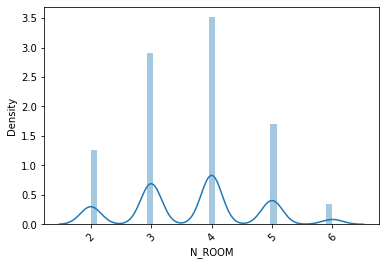

In [44]:
sns.distplot(df['N_ROOM'])
plt.xticks(rotation = 45)

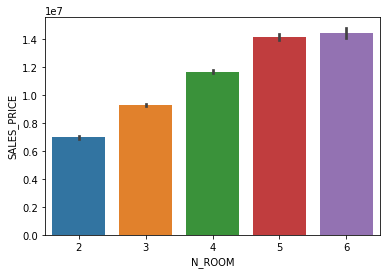

In [45]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

N_ROOMS increases then SALES_PRICE is automatically increasing.

There is a relationship in between the N_ROOM Feature and SALES_PRICE Target columns.

**EDA for Numerical Columns**

Checking Linear Relationship in between the INT_SQFT Feature and SALES_PRICE Target columns.

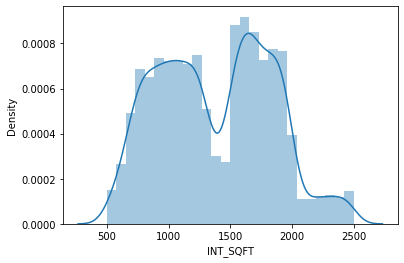

In [46]:
sns.distplot(df['INT_SQFT'])

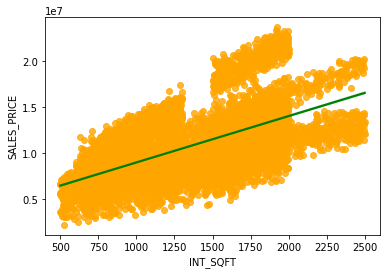

In [47]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is a strong linear relationship in between the INT_SQFT Feature and SALES_PRICE Target columns.

Checking Relationship in between the DIST_MAINROAD Feature and SALES_PRICE Target columns


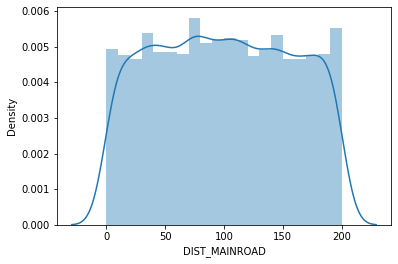

In [48]:
sns.distplot(df['DIST_MAINROAD'])

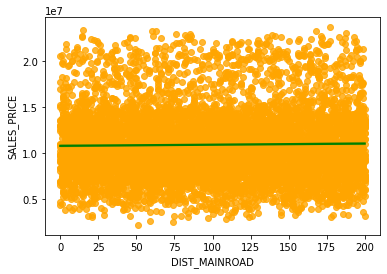

In [49]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no relationship in between the DIST_MAINROAD Feature and SALES_PRICE Target columns.

Checking Relationship in between the QS_ROOMS Feature and SALES_PRICE Target columns


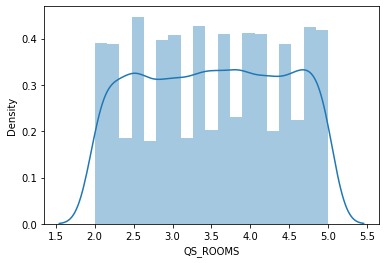

In [50]:
sns.distplot(df['QS_ROOMS'])

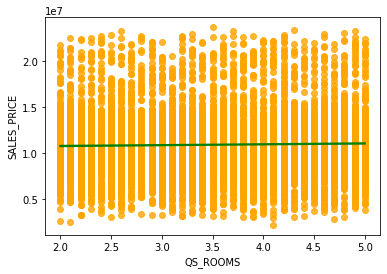

In [51]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no relationship in between the QS_ROOMS Feature and SALES_PRICE Target columns.

Checking Relationship in between the QS_BEDROOM Feature and SALES_PRICE Target columns


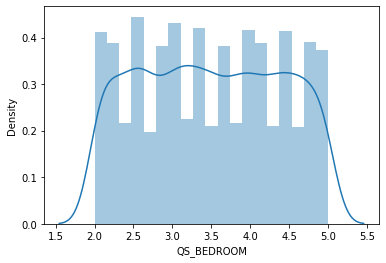

In [52]:
sns.distplot(df['QS_BEDROOM'])

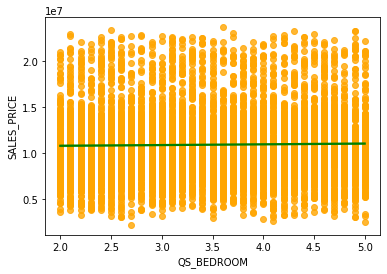

In [53]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no relationship in between the QS_BEDROOM Feature and SALES_PRICE Target columns.

Checking Relationship in between the QS_BATHROOM Feature and SALES_PRICE Target columns


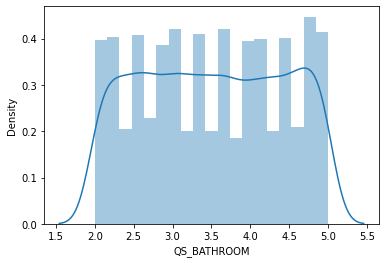

In [54]:
sns.distplot(df['QS_BATHROOM'])

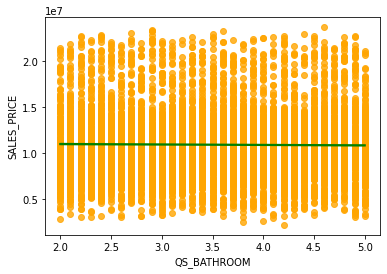

In [55]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no relationship in between the QS_BATHROOM Feature and SALES_PRICE Target columns.

Checking Relationship in between the QS_OVERALL Feature and SALES_PRICE Target columns


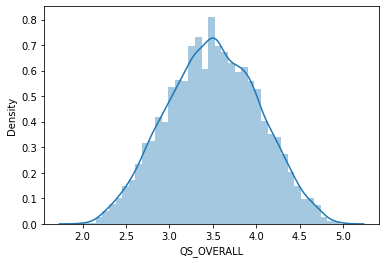

In [56]:
sns.distplot(df['QS_OVERALL'])

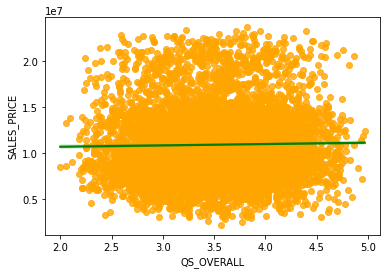

In [57]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no relationship in between the QS_OVERALL Feature and SALES_PRICE Target columns.

Checking Relationship in between the AGE Feature and SALES_PRICE Target columns


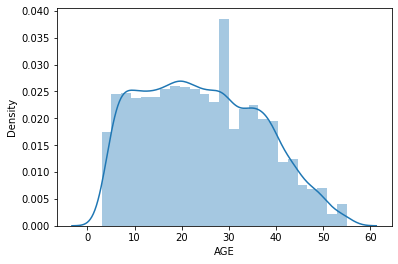

In [58]:
sns.distplot(df['AGE'])

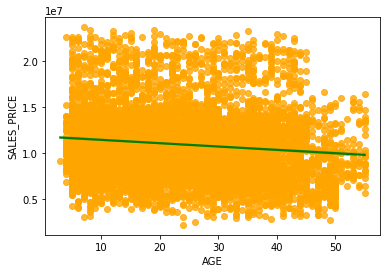

In [59]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is a negative relationship in between the AGE Feature and SALES_PRICE Target columns.

**Insights From the Analysis**

1. The distribution of the data in all the columns are normally distributed.
2. INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM Features having strong relationship with SALES_PRICE Traget.
3. SALE_COND,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL has no relationship with SALES_PRICE Target.

droping few attributes which has no relationship with sales_price target



In [60]:
df.drop(['SALE_COND','QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250,30


**Encoding of the data**

Label Encoding for binary class and multi class - ordinal data

In [61]:
df.AREA = df.AREA.map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0})
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':0, 'NoSewr':1, 'All Pub':2})
df.STREET = df.STREET.map({'No Access':0, 'Paved':1, 'Gravel':2})
df.MZZONE = df.MZZONE.map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})


One-Hot Encoding for Multi-Class Nominal data

In [62]:
df=pd.get_dummies(df,columns=["BUILDTYPE"])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


In [63]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
AGE                     int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Other         uint8
dtype: object

In [64]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


**Linear Regression Model**

In [65]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE'].values

Splitting

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Scaling

In [67]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Model Fitting

In [68]:
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

Predicting Values

In [69]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 9060355.12143695, 12007626.63596991, 14409580.05444575, ...,
       13699137.00241752, 15620422.13241801, 12039859.36309486])

Evaluation Metric-R2 Score


In [70]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.916252515752974


**K Nearest Neighbours algorithm (KNN)**

Hyper parameter Tuning,Fitting the model

In [71]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))


K value  :  1  train score :  0.9999970172238811  score :  0.9350938437097064
K value  :  2  train score :  0.9843041151066676  score :  0.9482205899028996
K value  :  3  train score :  0.9778307992746752  score :  0.9508406910010629
K value  :  4  train score :  0.973587453563508  score :  0.9518103370490951
K value  :  5  train score :  0.9706423606667668  score :  0.9525506022742676
K value  :  6  train score :  0.9681061143302194  score :  0.9518325149825774
K value  :  7  train score :  0.9660373603794415  score :  0.951168459303933
K value  :  8  train score :  0.9641945123648494  score :  0.950395045608951
K value  :  9  train score :  0.9623677381517852  score :  0.9497253575526973
K value  :  10  train score :  0.9608139275214165  score :  0.9488883145519307
K value  :  20  train score :  0.9498905031557053  score :  0.941239997008946
K value  :  50  train score :  0.9258108856447637  score :  0.9185127320835947


Scoring the model-R2 Score with best hyperparameter


In [72]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9541097246424485

**Decision Tree Regressor Algorithm**

Fitting the model

In [73]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

Predicted values

In [74]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([ 5625892.04545455, 12287706.49056604, 13775316.58432709, ...,
       13775316.58432709, 18885136.07361963,  9291877.26049089])

Evaluation Metric-R2 Score


In [75]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8797625052299284


**Random Forest Regressor Algorithm**

Fitting the model

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

Predicting Values


In [79]:
y_pred = rf.predict(X_test_scaled) 
y_pred


array([ 8322528.38915678, 12077528.36774351, 13702520.26177716, ...,
       11633010.70747374, 16518772.24387462, 10598069.24337815])

Evaluation Metric-R2 Score

In [78]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8703273099901923


**XG Boost Algorithm**

Tuning Based on the learning rate, Fitting the model


In [80]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled,y_train)))


Learning rate :  0.01  Train score :  -0.38334937184943807  Cross-Val score :  -0.39096027824836244
Learning rate :  0.02  Train score :  0.7465564395769506  Cross-Val score :  0.7431986500776431
Learning rate :  0.03  Train score :  0.9254119339609265  Cross-Val score :  0.9223228819796325
Learning rate :  0.04  Train score :  0.9623242914148331  Cross-Val score :  0.9600780031701074
Learning rate :  0.05  Train score :  0.9744050357899416  Cross-Val score :  0.9721294826354331
Learning rate :  0.06  Train score :  0.9808088764576547  Cross-Val score :  0.9783619504467733
Learning rate :  0.07  Train score :  0.9844483612812465  Cross-Val score :  0.9820995377651288
Learning rate :  0.08  Train score :  0.9866695274025555  Cross-Val score :  0.9850146421744208
Learning rate :  0.09  Train score :  0.9890589784410756  Cross-Val score :  0.9871830795030239
Learning rate :  0.1  Train score :  0.9900770796292021  Cross-Val score :  0.9885596741298779
Learning rate :  0.11  Train score : 

Calcuating Score- R2 Score

In [81]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

[18:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9937333947362926

Feature Importances


In [82]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],selector.support_))


[('AREA', True),
 ('INT_SQFT', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', False),
 ('BUILDTYPE_Other', False)]

In [ ]:
!pip install scikit-learn==0.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 44.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],sfs.get_support())))

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

The Columns AREA and BUILDTYPE_Commercial are the important features.

**Report:R2 Scores of all models are

Linear Regression - 0.917

K Nearest Neighbours - 0.951

Decision Tree - 0.884

Random Forest - 0.873

XG Boost - 0.994

Conclusion: The best Machine Learning algorithm for Chennai House Price Prediction is XG Boost Model.**
